# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Open csv data and read data

In [2]:
covid = pd.read_csv("covid_de.csv")

covid.head(10)

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
5,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-27,1,0,1
6,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-30,3,0,3
7,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-11-03,1,0,1
8,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-11-07,1,0,1
9,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-11-10,1,0,1


# Dealing with missing data

In [3]:
# check which column contains missing data
covid.isnull().sum()

state            0
county           0
age_group    12558
gender       96833
date             0
cases            0
deaths           0
recovered        0
dtype: int64

In [4]:
# fill missing data with "NA"
covid["age_group"].fillna("NA", inplace=True)
covid["gender"].fillna("NA", inplace=True)

# Data analysis and Visualization

## Bar charts

### Data analysis

In [5]:
# making a new data frame which is grouped by "state" and contains the total amount of data for each state
cov_tot = covid.groupby(by="state", as_index=False).sum()

cov_tot

,state,cases,deaths,recovered
0,Baden-Wuerttemberg,3815076,16269,3665038
1,Bayern,5098183,24329,4909713
2,Berlin,1092512,4639,1047422
3,Brandenburg,816459,5711,785281
4,Bremen,213243,786,203557
5,Hamburg,623747,2717,582949
6,Hessen,1998159,10324,1850325
7,Mecklenburg-Vorpommern,507556,2255,488338
8,Niedersachsen,2574704,9614,2410710
9,Nordrhein-Westfalen,5645817,25694,5340727


In [6]:
# calculating recovered rate and death rate and insert those data in seperate columns in the data frame
cov_tot["recovered rate"] = (cov_tot["recovered"]/cov_tot["cases"])*100
cov_tot["death rate"] = (cov_tot["deaths"]/cov_tot["cases"])*100

# taking the values as 2 decimal places
cov_tot = cov_tot.round(2)

cov_tot

,state,cases,deaths,recovered,recovered rate,death rate
0,Baden-Wuerttemberg,3815076,16269,3665038,96.07,0.43
1,Bayern,5098183,24329,4909713,96.30,0.48
2,Berlin,1092512,4639,1047422,95.87,0.42
3,Brandenburg,816459,5711,785281,96.18,0.70
4,Bremen,213243,786,203557,95.46,0.37
5,Hamburg,623747,2717,582949,93.46,0.44
6,Hessen,1998159,10324,1850325,92.60,0.52
7,Mecklenburg-Vorpommern,507556,2255,488338,96.21,0.44
8,Niedersachsen,2574704,9614,2410710,93.63,0.37
9,Nordrhein-Westfalen,5645817,25694,5340727,94.60,0.46


### Visualization

plotting bar charts

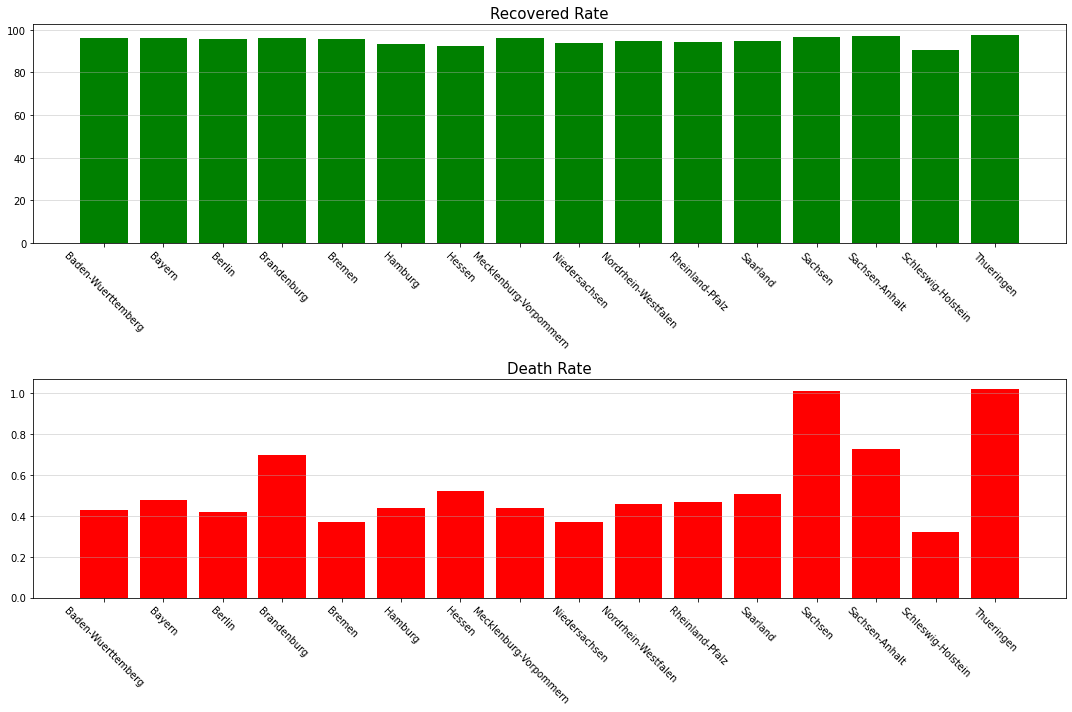

In [7]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.title(label="Recovered Rate", fontsize=15)
plt.bar(cov_tot["state"], cov_tot["recovered rate"], color="g")
plt.xticks(rotation=315)
plt.grid(axis="y", alpha=0.5)

plt.subplot(2, 1, 2)
plt.title(label="Death Rate", fontsize=15)
plt.bar(cov_tot["state"], cov_tot["death rate"], color="r")
plt.xticks(rotation=315)
plt.grid(axis="y", alpha=0.5)

plt.tight_layout()
plt.show()

## Pie Chart for each aged groups

### Data analysis

In [8]:
cov_age_grouped = covid.groupby(by="age_group", as_index=False).sum()

cov_age_grouped

,age_group,cases,deaths,recovered
0,00-04,895808,34,878948
1,05-14,3953375,30,3871193
2,15-34,8505449,404,8106683
3,35-59,10333178,7275,9809000
4,60-79,3077048,42684,2860689
5,80-99,975013,90294,849470
6,NA,30745,13,29877


### Visualization

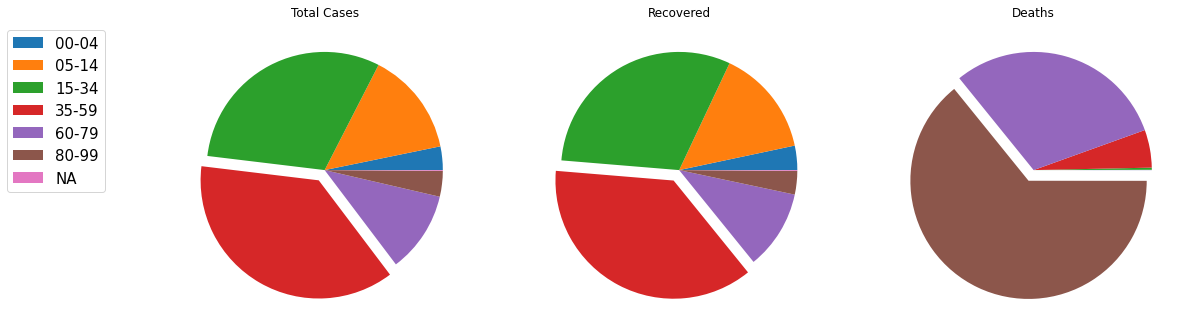

In [9]:
# making the explode for pie charts that has the maximum value
# making a list of zero values at the same size of age_group
lst = [0]*(len(cov_age_grouped["age_group"])-1)

# explode for total cases
index_max_cases = list(cov_age_grouped["cases"]).index(max(cov_age_grouped["cases"]))
lst_cases = lst.copy()
lst_cases.insert(index_max_cases, 0.1)

# explode for recovered
index_max_recovered = list(cov_age_grouped["recovered"]).index(max(cov_age_grouped["recovered"]))
lst_recovered = lst.copy()
lst_recovered.insert(index_max_recovered, 0.1)

# explode for deaths
index_max_deaths = list(cov_age_grouped["deaths"]).index(max(cov_age_grouped["deaths"]))
lst_deaths = lst.copy()
lst_deaths.insert(index_max_deaths, 0.1)

# Make figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

ax1.title.set_text('Total Cases')
ax1.pie(cov_age_grouped["cases"], explode=lst_cases)

ax2.title.set_text('Recovered')
ax2.pie(cov_age_grouped["recovered"], explode=lst_recovered)

ax3.title.set_text('Deaths')
ax3.pie(cov_age_grouped["deaths"], explode=lst_deaths)

plt.legend(labels=cov_age_grouped["age_group"], loc='upper left', bbox_to_anchor=(-3, 1.0), fontsize=15)

plt.show()

## Line & Scatter chart for each month of year

### Data analysis

In [10]:
# creating an extra column that contains only the year and month in "year-month" format
covid["year-month"] = covid["date"].apply(lambda x: "-".join(x.split("-")[0:2]))

covid.head(10)

,state,county,age_group,gender,date,cases,deaths,recovered,year-month
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,2020-03
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,2020-03
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,2020-04
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,2020-10
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1,2020-10
5,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-27,1,0,1,2020-10
6,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-30,3,0,3,2020-10
7,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-11-03,1,0,1,2020-11
8,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-11-07,1,0,1,2020-11
9,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-11-10,1,0,1,2020-11


In [11]:
cov_year = covid.groupby(by="year-month", as_index=False).sum()

cov_year

,year-month,cases,deaths,recovered
0,2020-01,11,0,11
1,2020-02,125,1,124
2,2020-03,73937,2683,71254
3,2020-04,88188,5737,82451
4,2020-05,19777,698,19079
5,2020-06,12921,145,12776
6,2020-07,15194,143,15051
7,2020-08,34505,120,34385
8,2020-09,49297,341,48956
9,2020-10,252748,3244,249504


### Visualisation

Visualisation for tatal covid cases

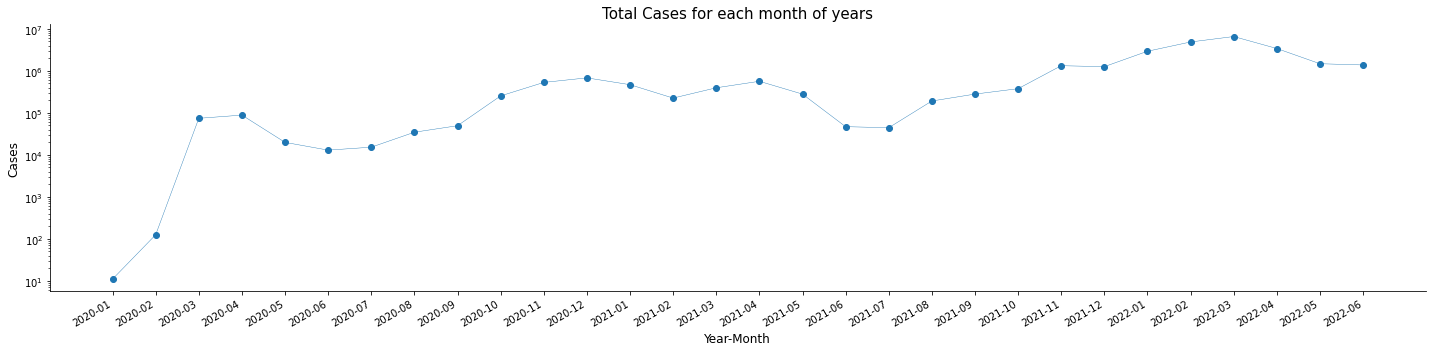

In [12]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111, axisbelow=True, yscale="log")

ax.set_title(label='Total Cases for each month of years', fontsize=15)
ax.set_xlabel("Year-Month", fontsize=12)
ax.set_ylabel("Cases", fontsize=12)
ax.plot(cov_year["year-month"], cov_year["cases"], "o-", lw=0.4)

fig.autofmt_xdate()

# for removing top and right borders of the coordinate system
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
    
plt.tight_layout()
plt.show()

Visualisation for recovary and death cases

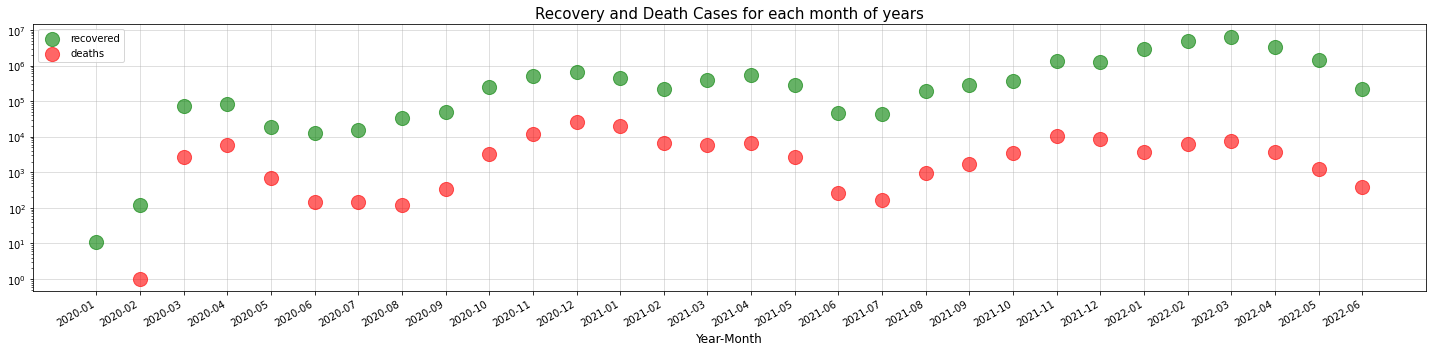

In [13]:
fig= plt.figure(figsize=(20, 5))

ax = fig.add_subplot(111, axisbelow=True, yscale="log")

ax.set_title(label='Recovery and Death Cases for each month of years', fontsize=15)
ax.scatter(cov_year["year-month"], cov_year["recovered"], color="g", s=200, alpha=0.6, label="recovered")

ax.scatter(cov_year["year-month"], cov_year["deaths"], color="r", s=200, alpha=0.6, label="deaths")

ax.set_xlabel("Year-Month", fontsize=12)

fig.autofmt_xdate()

ax.grid(alpha=0.5)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()